# Assignment07: Stats and Modeling 

## Word Frequencies in Macbeth

In [28]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from string import punctuation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
myStopWords = list(punctuation) + stopwords.words('english')

In [3]:
with open('Macbeth.txt','r') as f:
    macbeth = f.read()
words = word_tokenize(macbeth.lower().replace('th’','the'))
macbethwords = [w for w in words if w not in myStopWords or w in ['the']]
# macbethstemmed = [PorterStemmer().stem(w) for w in macbethwords]
macbethstemmed = [WordNetLemmatizer().lemmatize(w) for w in macbethwords]

In [4]:
macbethwords[:20]

['macbeth',
 'william',
 'shakespeare',
 'contents',
 'act',
 'scene',
 'i.',
 'open',
 'place',
 'scene',
 'ii',
 'camp',
 'near',
 'forres',
 'scene',
 'iii',
 'heath',
 'scene',
 'iv',
 'forres']

In [5]:
macbethstemmed[:20]

['macbeth',
 'william',
 'shakespeare',
 'content',
 'act',
 'scene',
 'i.',
 'open',
 'place',
 'scene',
 'ii',
 'camp',
 'near',
 'forres',
 'scene',
 'iii',
 'heath',
 'scene',
 'iv',
 'forres']

In [7]:
macbethfreq = FreqDist(macbethstemmed)

In [8]:
macbethfreq['the']

775

In [23]:
macbethfreq2 = []
for i in macbethfreq.values(): 
    macbethfreq2.append(i)

In [40]:
data = {'word' : macbethfreq.keys(), 'freq' : macbethfreq.values()}

df = pd.DataFrame(data)

df

,word,freq
0,macbeth,282
1,william,1
2,shakespeare,1
3,content,3
4,act,16
...,...,...
3000,watchful,1
3001,producing,1
3002,butcher,1
3003,fiend-like,1


In [43]:
df['freq'].describe()

count    3005.000000
mean        3.876206
std        20.822453
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       775.000000
Name: freq, dtype: float64

In [101]:
df[df['freq'] < 25].describe()

,freq
count,2939.000000
mean,2.434502
std,3.121553
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,24.000000


<AxesSubplot:ylabel='Frequency'>

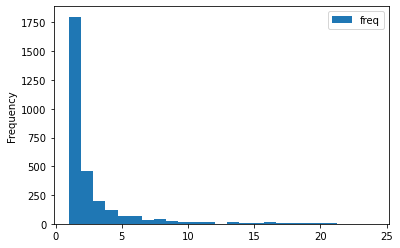

In [66]:
df[df['freq'] < 25].plot(kind = 'hist', bins = 25)

Plotting the frequencies of words in Macbeth. 
Only words that occur fewer than 25 times were included in this plot, as this represents the words within 1 standard deviation of the mean. 

**Mean = 3.8**

**Trimmed Mean = 2.4**

**Median and Mode = 1.0**

**STD = 20.8**

**STD Trimmed = 3.12**

**25% = 1.0**

**75% = 2.0**

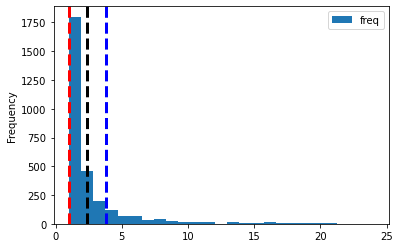

In [103]:
ax = df[df['freq'] < 25].plot(kind = 'hist', bins = 25)

ax.axvline(3.8, color='b', linestyle='--', lw=3)
ax.axvline(1.0, color='r', linestyle='--', lw=3)
ax.axvline(2.4, color='k', linestyle='--', lw=3)


## Foray into Machine Learning 

In [39]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np
features_df = df.data
target_df = df.target


In [2]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
#  Column 11 is a quantitative measure of disease progression one year after baseline
target_df

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [7]:
df

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [15]:
features_keys = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [24]:
for i in features_keys: 
    print(np.corrcoef(features_df[i], target_df))

[[1.         0.18788875]
 [0.18788875 1.        ]]
[[1.       0.043062]
 [0.043062 1.      ]]
[[1.         0.58645013]
 [0.58645013 1.        ]]
[[1.         0.44148385]
 [0.44148385 1.        ]]
[[1.         0.21202248]
 [0.21202248 1.        ]]
[[1.         0.17405359]
 [0.17405359 1.        ]]
[[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
[[1.         0.43045288]
 [0.43045288 1.        ]]
[[1.         0.56588343]
 [0.56588343 1.        ]]
[[1.         0.38248348]
 [0.38248348 1.        ]]


The column that had the highest correlation coefficient was column 3: BMI, followed closely by column 9: s5 or ltg, possibly log of serum triglycerides level

In [30]:
data2 = {'bmi' : features_df['bmi'], 'index' : target_df}

df2 = pd.DataFrame(data2)

df2

,bmi,index
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
...,...,...
437,0.019662,178.0
438,-0.015906,104.0
439,-0.015906,132.0
440,0.039062,220.0


<AxesSubplot:xlabel='bmi', ylabel='index'>

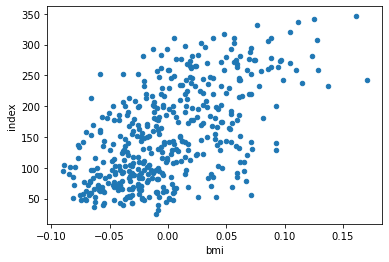

In [31]:
df2.plot(kind = 'scatter', x = 'bmi', y = 'index')

In [32]:
import seaborn as sns

<AxesSubplot:xlabel='bmi', ylabel='index'>

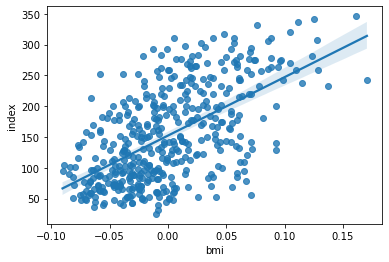

In [35]:
# scatter plot including line of best fit using seaborn 
sns.regplot(x = df2['bmi'], y = df2['index'])

<AxesSubplot:xlabel='s2', ylabel='index'>

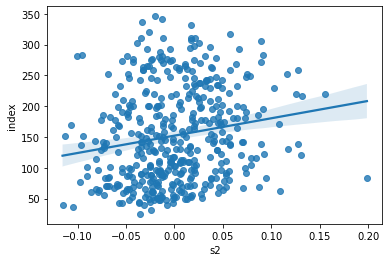

In [36]:
# scatter plot of a weak correlational coefficient to compare with 
sns.regplot(x = features_df['s2'], y = df2['index'])

The correlation coefficient was about 0.58. While this was the strongest coefficient of the features_df columns, it is not itself an exceedingly strong relationship, which is why we see a lot of the data outside or far away from the line of best fit. 

In [41]:
x = df2[['bmi']]
y = df2['index']

In [42]:
reg = LinearRegression().fit(x, y)

In [45]:
reg.coef_

array([949.43526038])

In [47]:
reg.intercept_

152.1334841628967

In [48]:
ytrain = reg.intercept_ + reg.coef_ * x

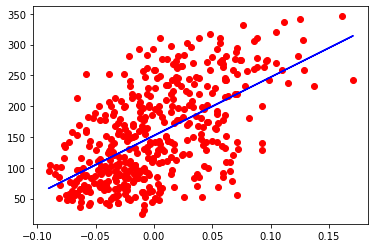

In [49]:
plt.plot(x,y,'ro',x,ytrain,'b-');

In [50]:
mean_squared_error(y, ytrain)

3890.4565854612724

In [51]:
r2_score(y, ytrain)

0.3439237602253803

In [52]:
x2 = features_df[['s2']]
y2 = df2['index']

In [53]:
reg2 = LinearRegression().fit(x2, y2)

In [54]:
reg2.coef_

array([281.78459335])

In [55]:
reg2.intercept_

152.1334841628959

In [56]:
ytrain2 = reg2.intercept_ + reg2.coef_ * x2

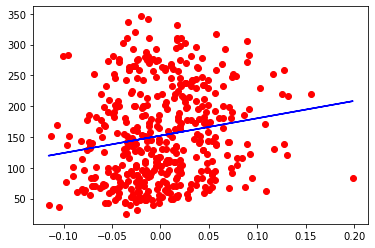

In [57]:
plt.plot(x2,y2,'ro',x2,ytrain2,'b-');

In [58]:
mean_squared_error(y2, ytrain2)

5750.241102677782

In [59]:
r2_score(y2, ytrain2)

0.030294651136685613